# Step 1 : Importing Dependencies and Loading Data set

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [29]:
df = pd.read_csv('suv_data.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [30]:
df.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


# Step 2 : Exploratory Analysis

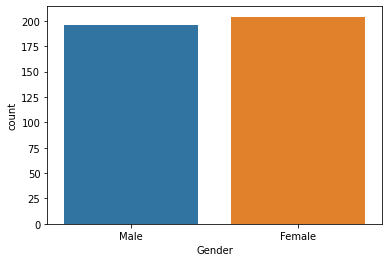

In [34]:
sns.countplot(x='Gender',data=df)

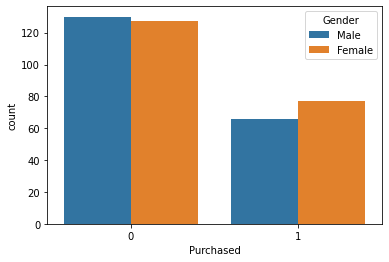

In [36]:
sns.countplot(df['Purchased'], hue=df['Gender'])
plt.savefig('./imgs/pur_gender.png')

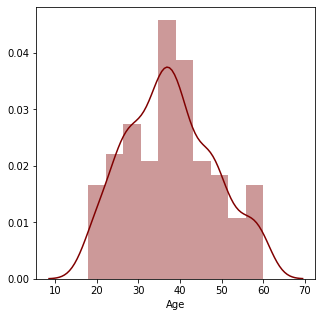

In [42]:
plt.figure(figsize = (5,5))
sns.distplot(df['Age'],color='maroon')

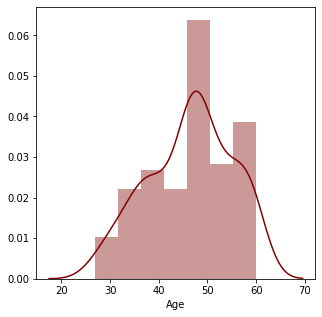

In [46]:
plt.figure(figsize = (5,5))
sns.distplot(df[df['Purchased']==1]['Age'],color='maroon')

# Step 3 : Data Cleaning

In [48]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Gender"] = le.fit_transform(df['Gender'])

In [49]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


# Step 4 : Train Test Split 

In [50]:
y = df['Purchased']
x = df.drop(['Purchased'],axis=1)
from sklearn.model_selection import train_test_split
X_train,x_test,Y_train,y_test = train_test_split(x,y,test_size = 0.6,random_state = 101)

# Step 5 : Training the Machine Learning Model

## Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression() # ロジスティック回帰モデルのインスタンスを作成
lr.fit(X_train, Y_train) # ロジスティック回帰モデルの重みを学習
y_pred = lr.predict(x_test)
print(y_pred)

[0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0
 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0]


# Step 6 : Model Evaluation

## Check Accuracy

In [52]:
from sklearn.metrics import confusion_matrix, accuracy_score

print('Confusion Matrix = \n', confusion_matrix(y_true=y_test, y_pred=y_pred))
print('\n Accuracy = ', accuracy_score(y_true=y_test, y_pred=y_pred))

Confusion Matrix = 
 [[147   7]
 [ 47  39]]

 Accuracy =  0.775


In [53]:
print(259251/(259251+18724))

0.9326414245885422


## Check the each input influence

In [54]:
print("coefficient = ", lr.coef_)
print("intercept = ", lr.intercept_)

coefficient =  [[-1.63668464e-07 -1.65214072e-11  1.46606639e-08  2.65718279e-05]]
intercept =  [8.36867306e-13]


In [55]:
lr.coef_.reshape(-1,)

array([-1.63668464e-07, -1.65214072e-11,  1.46606639e-08,  2.65718279e-05])

In [57]:
odds = pd.DataFrame({"Name":df.columns[:len(lr.coef_.reshape(-1,))],
                    "Coefficients":np.abs(lr.coef_.reshape(-1,))}).sort_values(by='Coefficients')
odds

,Name,Coefficients
1,Gender,1.652141e-11
2,Age,1.466066e-08
0,User ID,1.636685e-07
3,EstimatedSalary,2.657183e-05
